In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1')

C:\Users\vinay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   

              CurrentJobTitleSelect TitleFit  ... JobFactorExperienceLevel  \
0             DBA/Database Engineer     Fine  ...                      NaN   
1                               NaN      NaN  ...                      NaN   
2                               NaN      NaN  ...           Very Important   
3  Operations Research Practitioner   Poorly  ...                      NaN   
4                Computer Scientist     Fine  ...                      NaN   

  JobFactorDepartment  JobFactorTitle JobFactorCompanyFunding JobFactorImpact  \
0                 NaN             NaN                     NaN             NaN   
1                 NaN             NaN                     NaN             NaN   
2      Very Important  Very Important          Very Important  Very Important   
3                 NaN             NaN                     NaN             NaN   
4                 NaN             NaN                     NaN             NaN   

  JobFactorRemote JobFactorIndustry JobFactorLeaderReputation  \
0             NaN               NaN                       NaN   
1             NaN               NaN        Somewhat important   
2  Very Important    Very Important            Very Important   
3             NaN               NaN                       NaN   
4             NaN               NaN                       NaN   

  JobFactorDiversity JobFactorPublishingOpportunity  
0                NaN                            NaN  
1                NaN                            NaN  
2     Very Important                 Very Important  
3                NaN                            NaN  
4                NaN                            NaN  

[5 rows x 228 columns]

In [4]:
data.shape

(16716, 228)

In [5]:
data.isnull().values.any()

True

# Explore Dataset!

## Gender Select

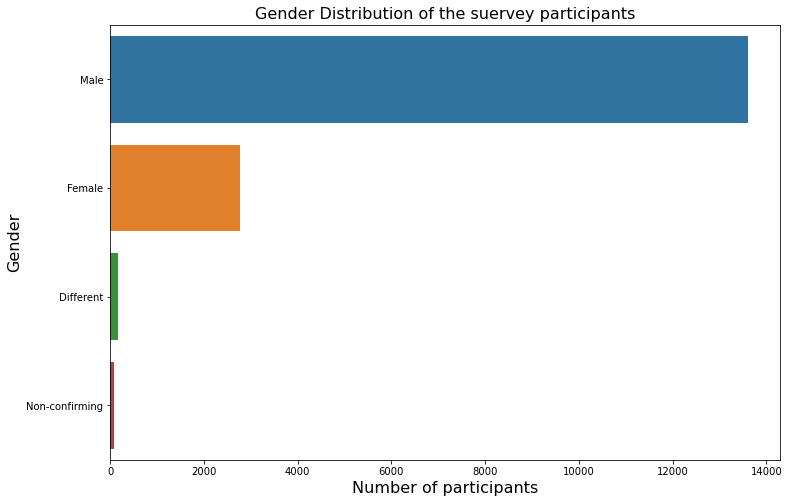

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(y='GenderSelect',data=data,order = data['GenderSelect'].value_counts().index)
plt.title("Gender Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.yticks(range(4), ['Male', 'Female', 'Different', 'Non-confirming'])
plt.show()



This ratio is disturbing. I am actually surprised seeing such a low number of females working in DS even in 2017.

## Country

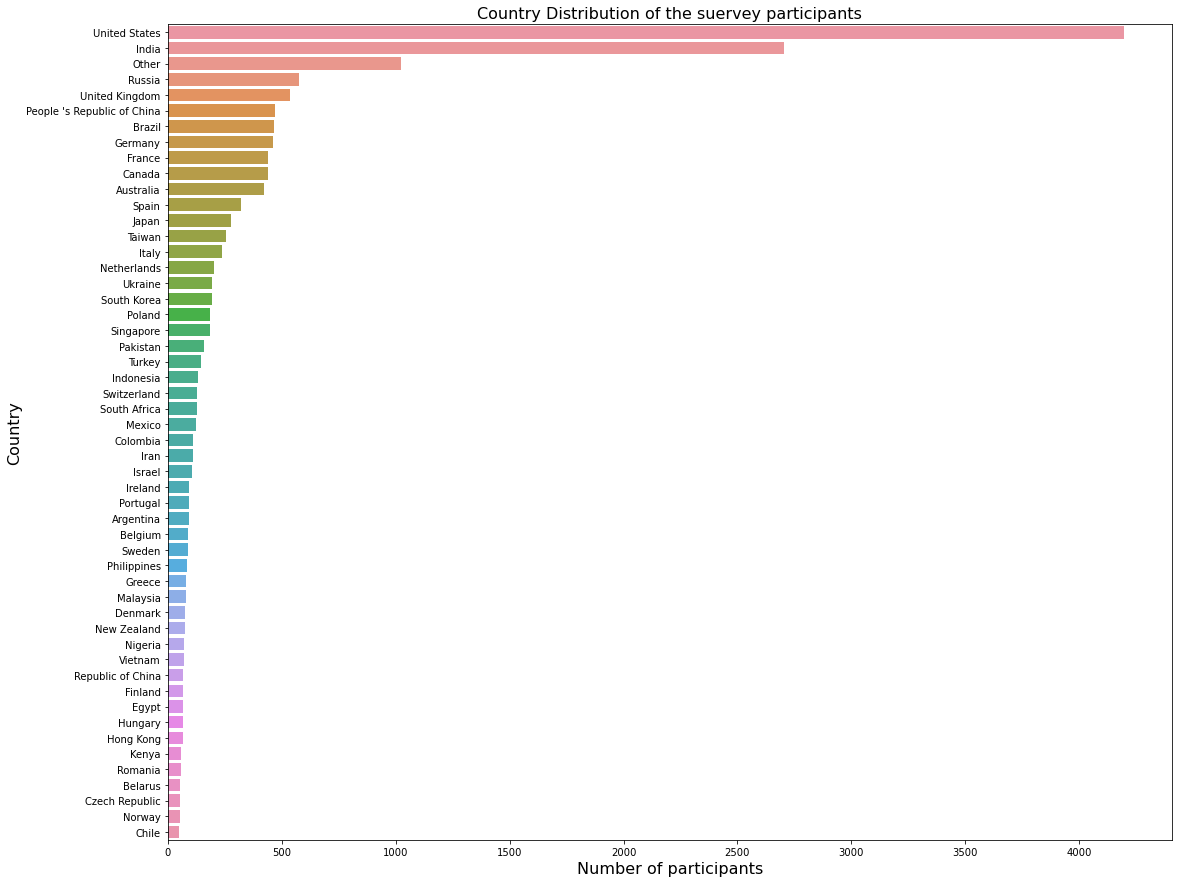

In [7]:
plt.figure(figsize=(18,15))
sns.countplot(y='Country',data=data,order = data['Country'].value_counts().index)
plt.title("Country Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show()

So, most of the people working in the field of data science are based in United States followed by India, Russia and United Kingdom. It's a surprise that countries like Germany, China and Japan are lagging behind here.

## Age

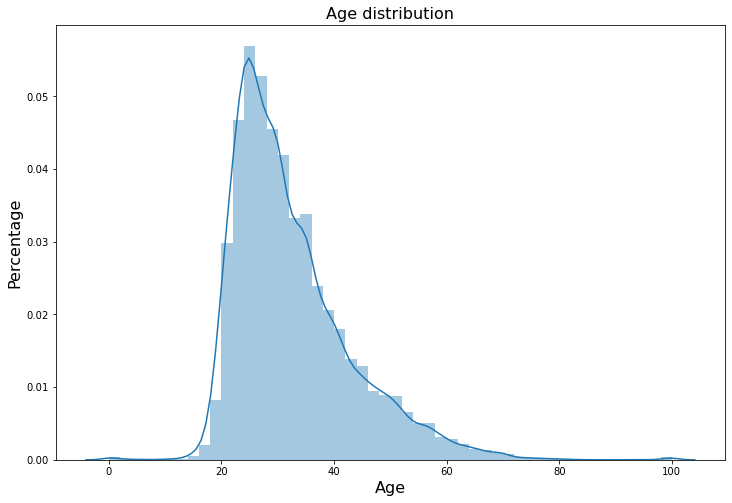

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(data.Age)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('Age distribution',fontsize=16)
plt.show()

Maximum people doing DS are somewhat between 19-35. Let's see what's the age difference between the top two countries

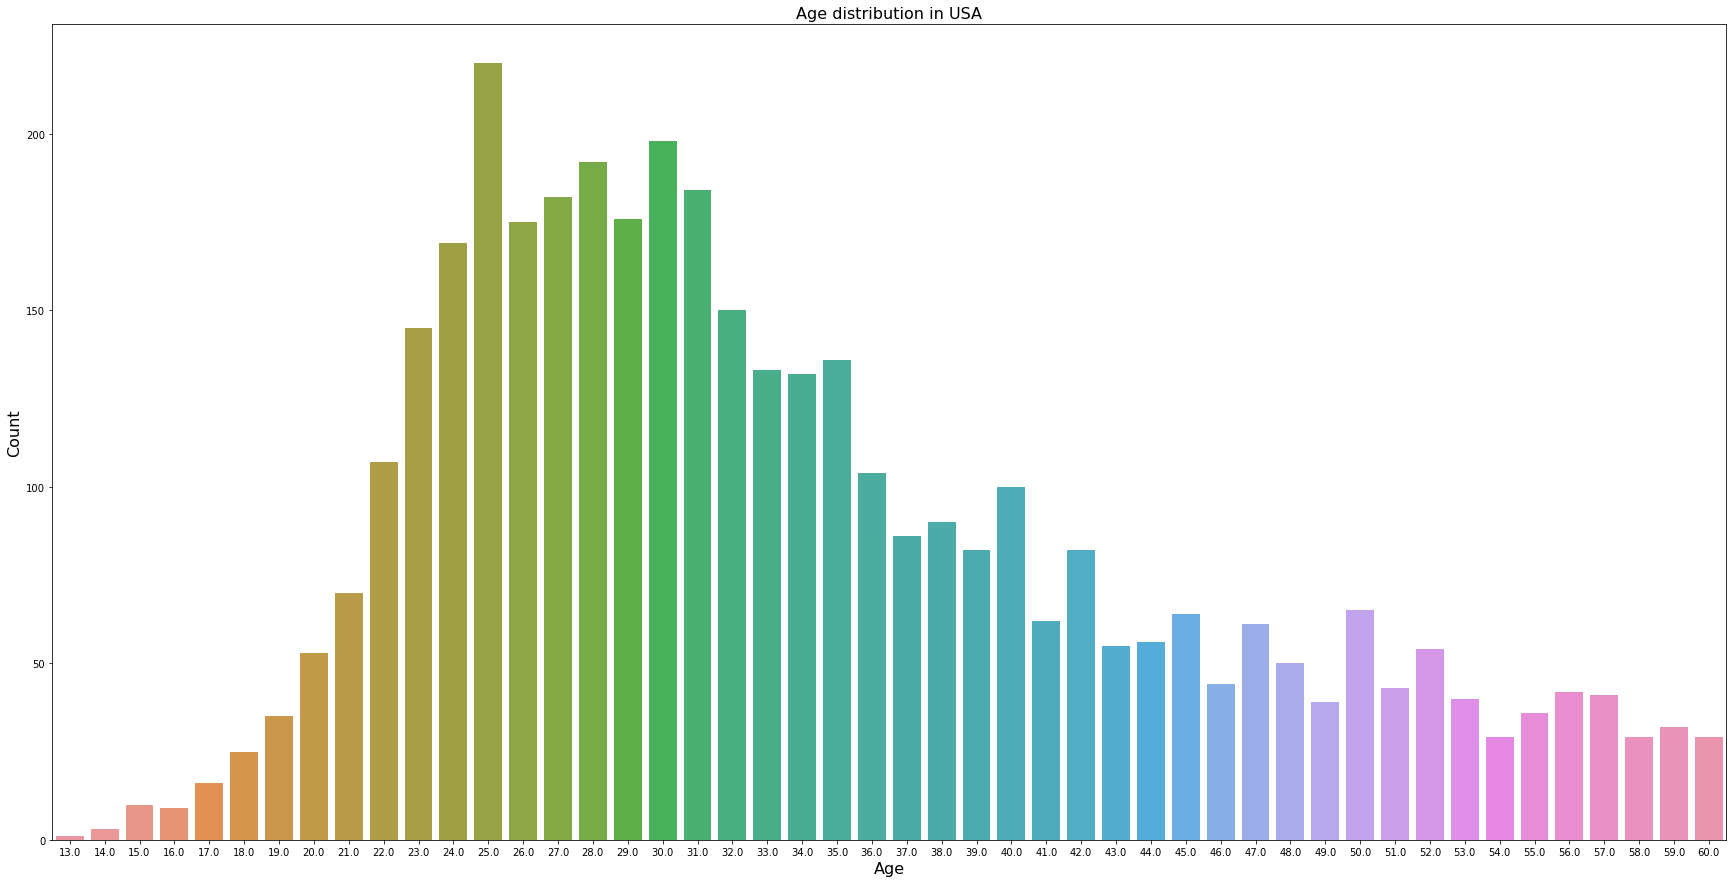

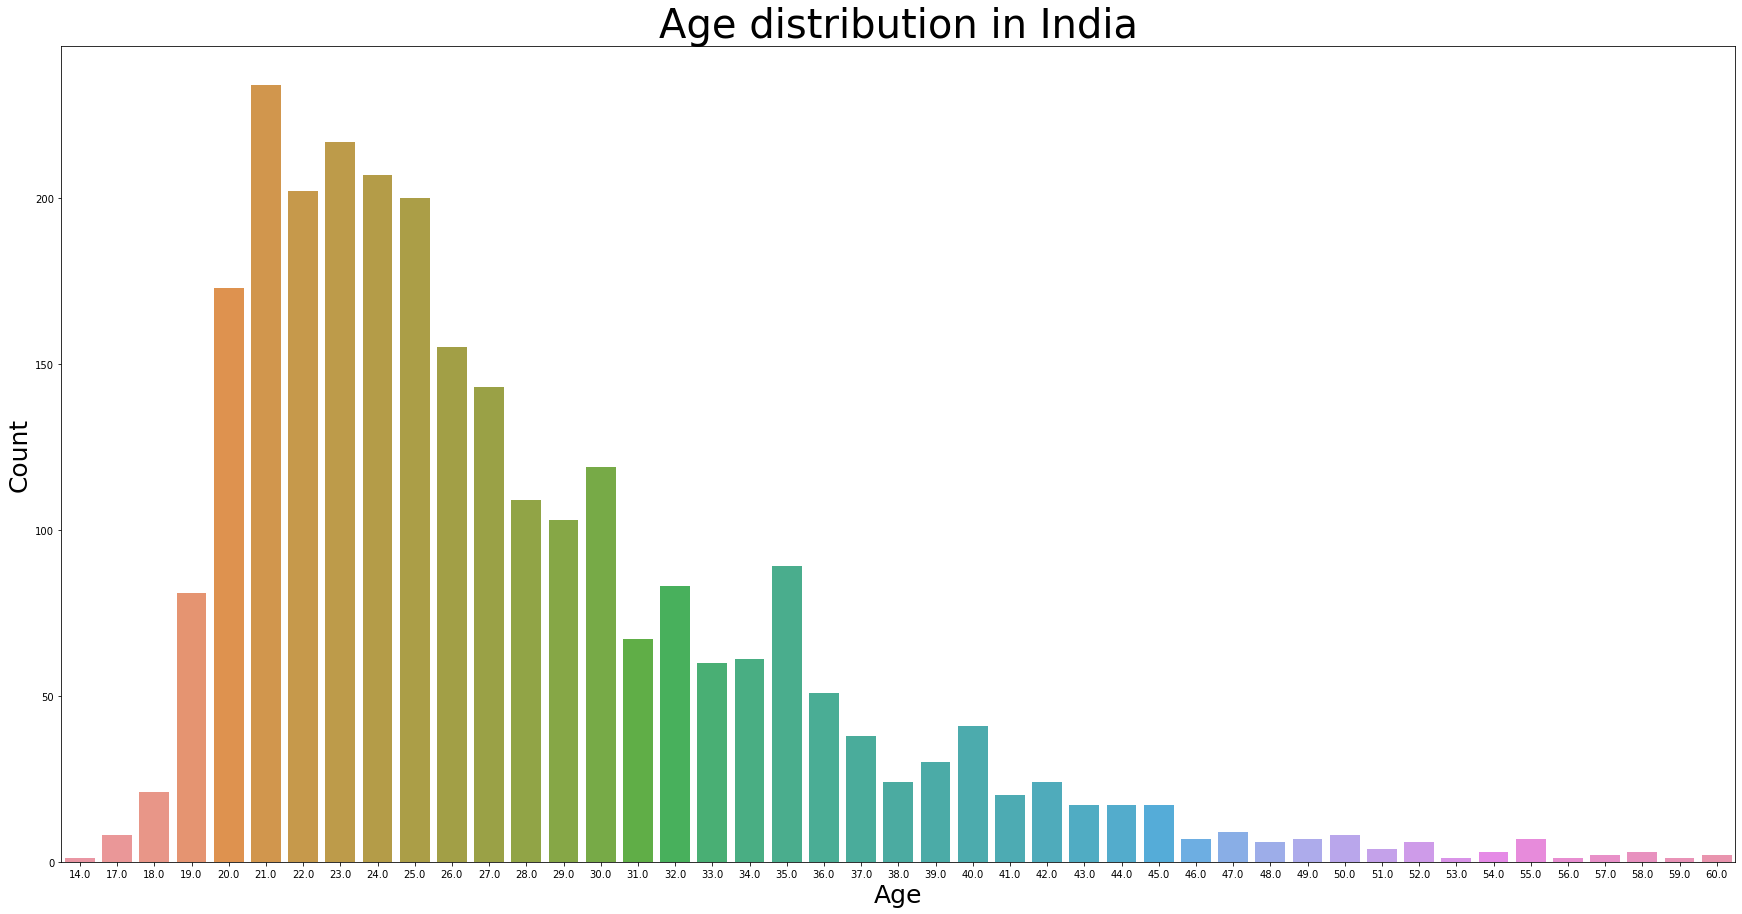

In [9]:
age_country = data[['Country', 'Age']]
# Drop the null values
age_country = age_country.dropna()
# Drop values > 60 and < 10
age_country = age_country.drop(age_country.index[(age_country['Age'] > 60) | (age_country['Age'] < 10)]).reset_index(drop=True)
# Get USA and India from the groups
age_USA = age_country.groupby('Country').get_group('United States')
age_India = age_country.groupby('Country').get_group('India')


# Count and plot 
age_count = age_USA.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution in USA',fontsize=16)
plt.show()


age_count = age_India.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Age distribution in India',fontsize=40)
plt.show()


While the minimum age in USA is less than minimum age in India but the mode age in India is much better as compared to USA. In USA, maximum people doing DS are of age 25-35 while in India it is between 21-27. Nice.

## Employment Status

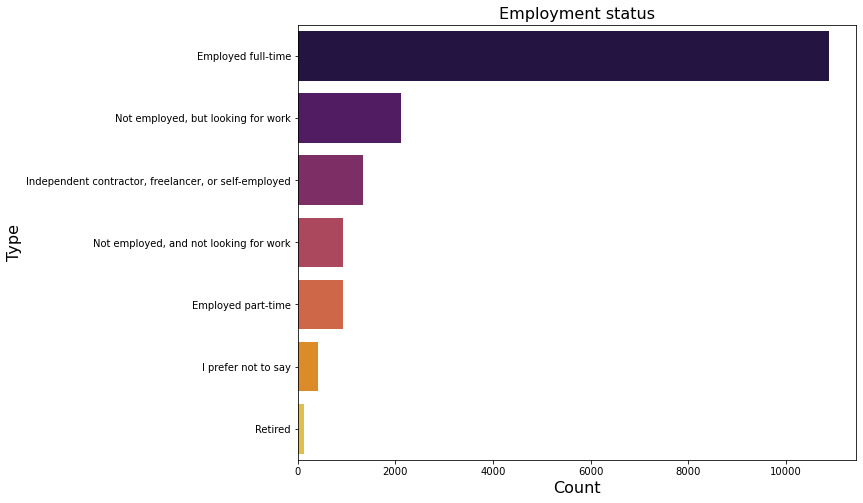

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(y='EmploymentStatus',data=data,orient='h',order = data['EmploymentStatus'].value_counts().index,palette=sns.color_palette('inferno',7))
plt.title('Employment status', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Type', fontsize=16)
plt.show()   

Most of the people are employed full time which is obvious given the demand now-a-days. The most interesting are the ones who are not employed and still not looking for work. (Attitude!!)

## Major Select

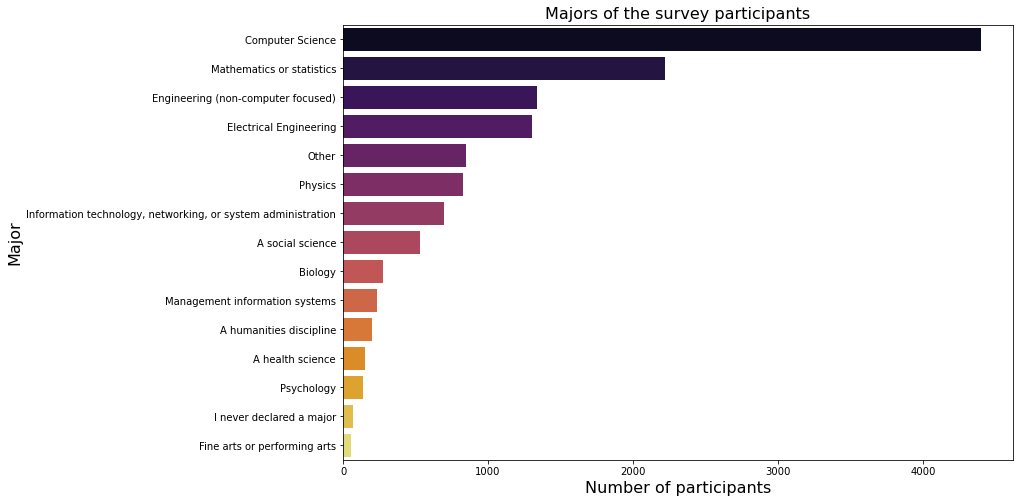

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(y=data['MajorSelect'] ,data=data,orient='h',order = data['MajorSelect'].value_counts().index,palette=sns.color_palette('inferno',15))
plt.title("Majors of the survey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Major", fontsize=16)
plt.show()

The majority of our respondents have their undergraduate majors in Computer Science, Mathematics or Engineering. Math and CS also happen to be the fields whose intersection is Data Science. That said, the number of majors reprsented in our dataset is fairly diverse with people coming in from all walks of life including humanities, fine arts and liberal arts.

## Current Job Title Select

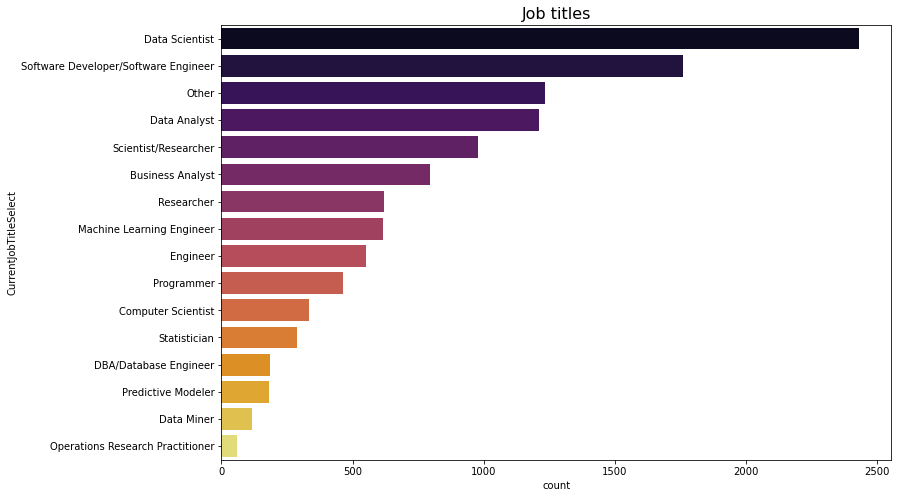

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(y=data['CurrentJobTitleSelect'] ,data=data,order = data['CurrentJobTitleSelect'].value_counts().index,palette=sns.color_palette('inferno',16))
plt.title("Job titles", fontsize=16)
plt.show()

## Formal Education

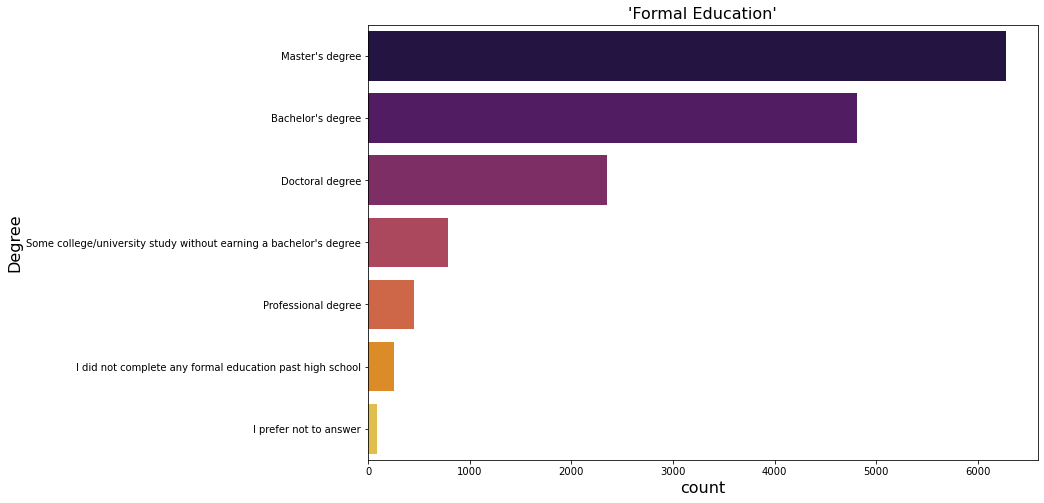

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(y=data['FormalEducation'] ,data=data,orient='h',order = data['FormalEducation'].value_counts().index,palette=sns.color_palette('inferno',7))
plt.title("'Formal Education'", fontsize=16)
plt.xlabel("count", fontsize=16)
plt.ylabel("Degree", fontsize=16)
plt.show()

A large fraction of our users have a Master's Degree which alludes the importance of formal education in the field of Data Science. Bachelor's Degree holders come in second. A considerable number of people also have a Doctoral Degree which.

## Coding experience(in years)

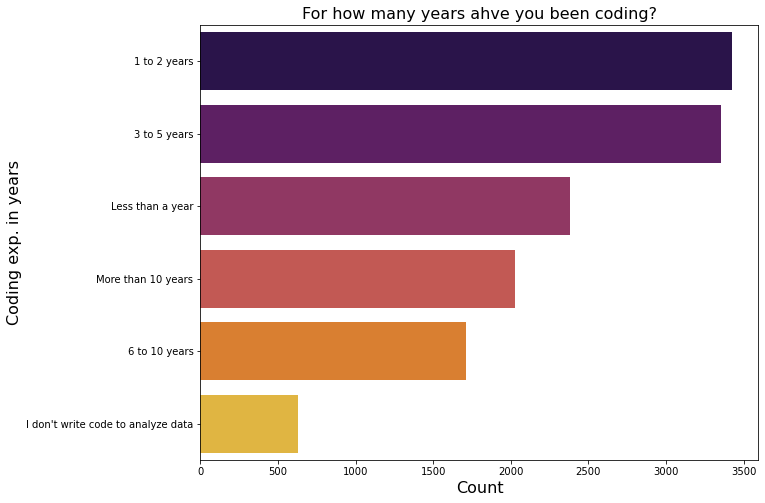

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['Tenure'] ,data=data,order = data['Tenure'].value_counts().index,palette=sns.color_palette('inferno',6))
plt.title("For how many years ahve you been coding?", fontsize=16)
plt.ylabel("Coding exp. in years", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.show()

Most of our respondents have less than 5 years of experience of writing code. A considerable chunk have less than 2 years of experience writing code


# What do Kagglers say about Data Science ?

## Q1. Which Language should I learn? Python or R?

One of the first and the most commonly asked questions about Data Science is Language Preference. Python and R are the two most ubiquitious languages in Data Science and both have their own communities of staunch supporters who swear by their respective languages. Let us take a look at what our respondents had to say.

In [15]:
import plotly.express as px
temp=data['LanguageRecommendationSelect'].value_counts()
labels = temp.index
sizes = temp.values
fig = px.pie(temp, values=temp.values, names=temp.index, title='Type of Language')
fig.show()

So it seems that Python coding workers who use exclusively Python are nearly twice as many as those who use exclusively R.

## Q2. What is the preferenc by profession of two of the most popular data science languages, Python and R.

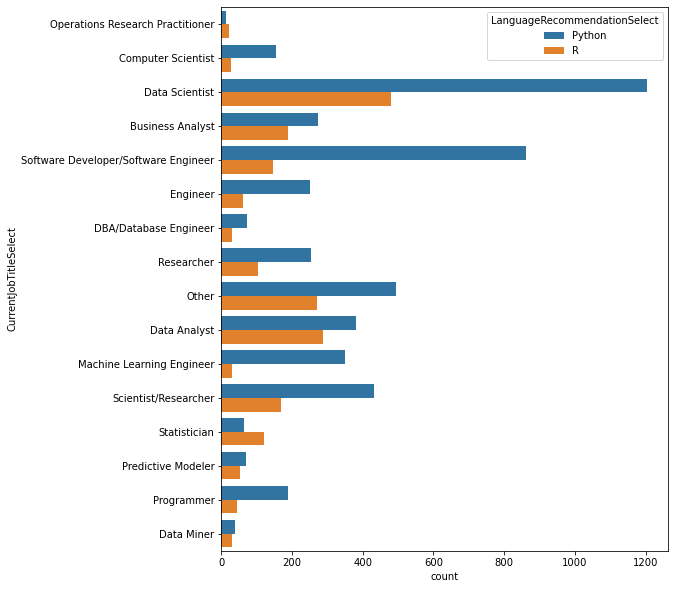

In [16]:
temp = data[(data['CurrentJobTitleSelect'].notnull()) & ((data['LanguageRecommendationSelect'] == 'Python') | (data['LanguageRecommendationSelect'] == 'R'))]
plt.figure(figsize=(8, 10))
sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=temp)

Almost all professions tend to prefer Python as their Language Recommendation of Choice. An important exception are the Statisticians who generally tend to prefer R. The only other profession that uses R more than Python is the Operations Research Practitioner.

## Q3. How did you start learning Data Science ?

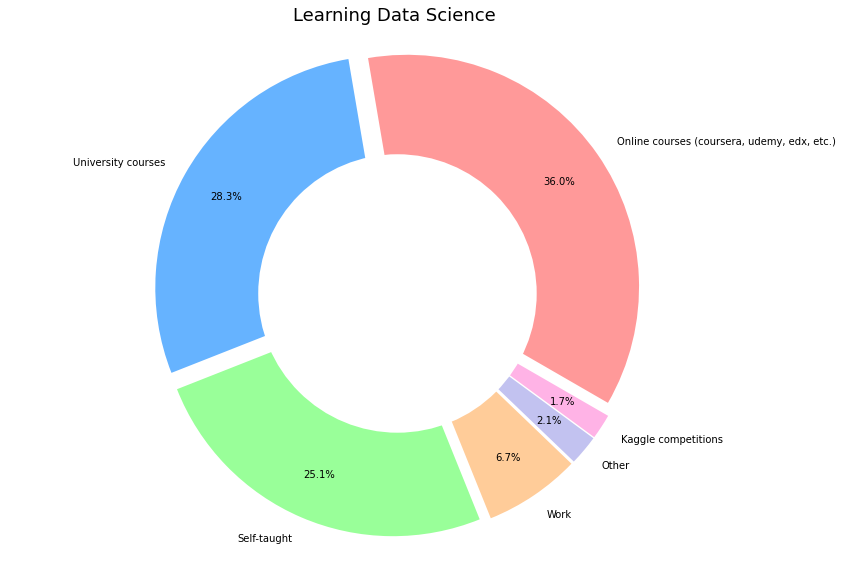

In [17]:
plt.figure(figsize=(12,8))
# Pie chart
temp=data['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=-30, pctdistance=0.80, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 
plt.title('Learning Data Science ',fontsize=18)
plt.tight_layout()
plt.show()

The most popular way to start learning Data Science / Machine Learning is Online Courses.

## Q4. Where should I learn Data Science from?

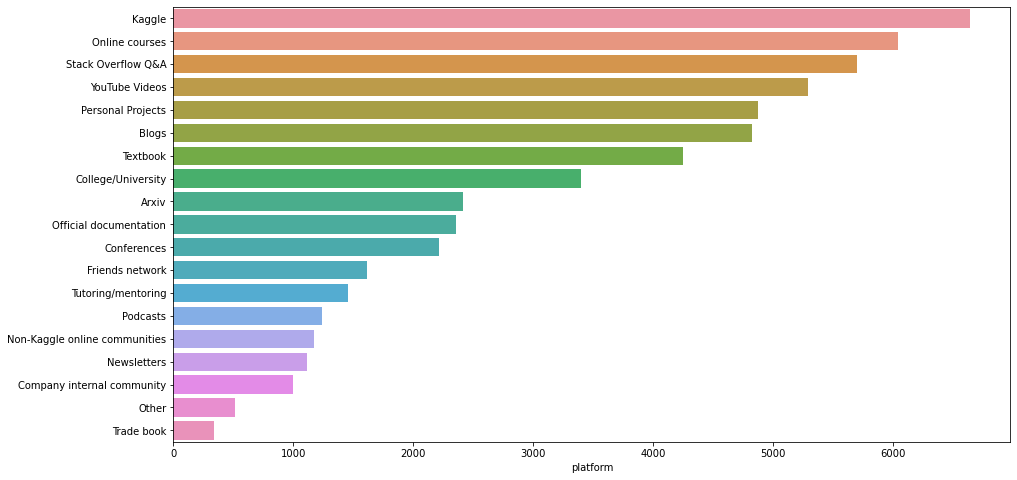

In [18]:
#Explode the Pandas Dataframe to get the number of times each Learning Platform was mentioned
data['LearningPlatformSelect'] = data['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = data.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'
plt.figure(figsize=(15,8))
temp = s[s != 'nan'].value_counts()
sns.barplot(y=temp.index, x=temp)

Kaggle is the most popular learning platform amongst our respondents. However, there is a possibility that their responses may have been biased on account of Kaggle conducting this survey. Online Courses, Stack Overflow and YouTube figure in the top 5 most preferred learning platforms. Interestingly, a College or University degree doesn't presume as much importance as I had expected and is considered less potent than textbooks.

## Q5. Can you recommend some blogs, podcasts, courses, etc. that I can follow?

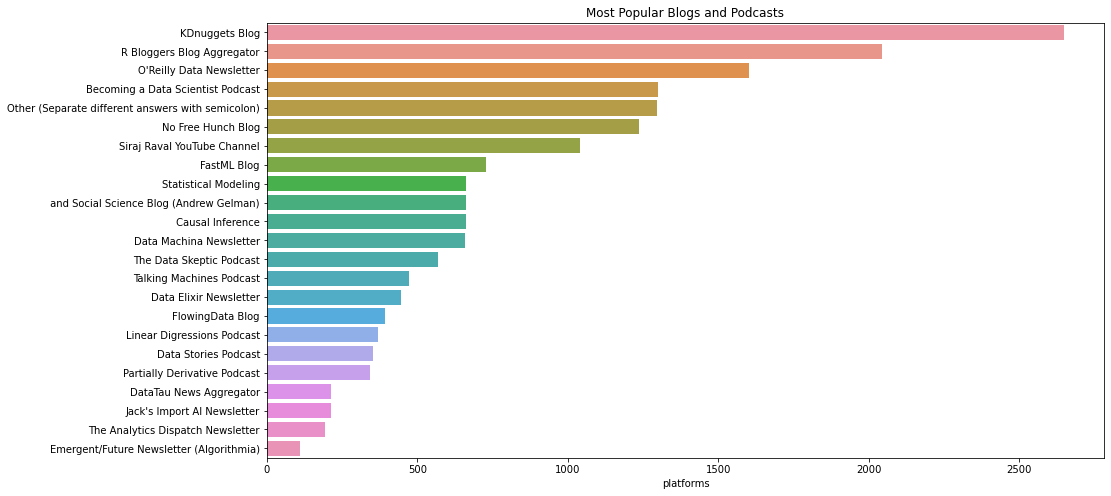

In [19]:
data['BlogsPodcastsNewslettersSelect'] = data['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
s = data.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s = s[s != 'nan'].value_counts()
plt.figure(figsize=(15,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

KDNuggets Blog, R Bloggers Blog Aggregator and O'Reilly Data Newsletter are the most popular blogs and podcasts among our respondents.

## Q6. What is the Next Big Thing in Data Science?

Text(0.5, 1.0, 'ML Method Next Year')

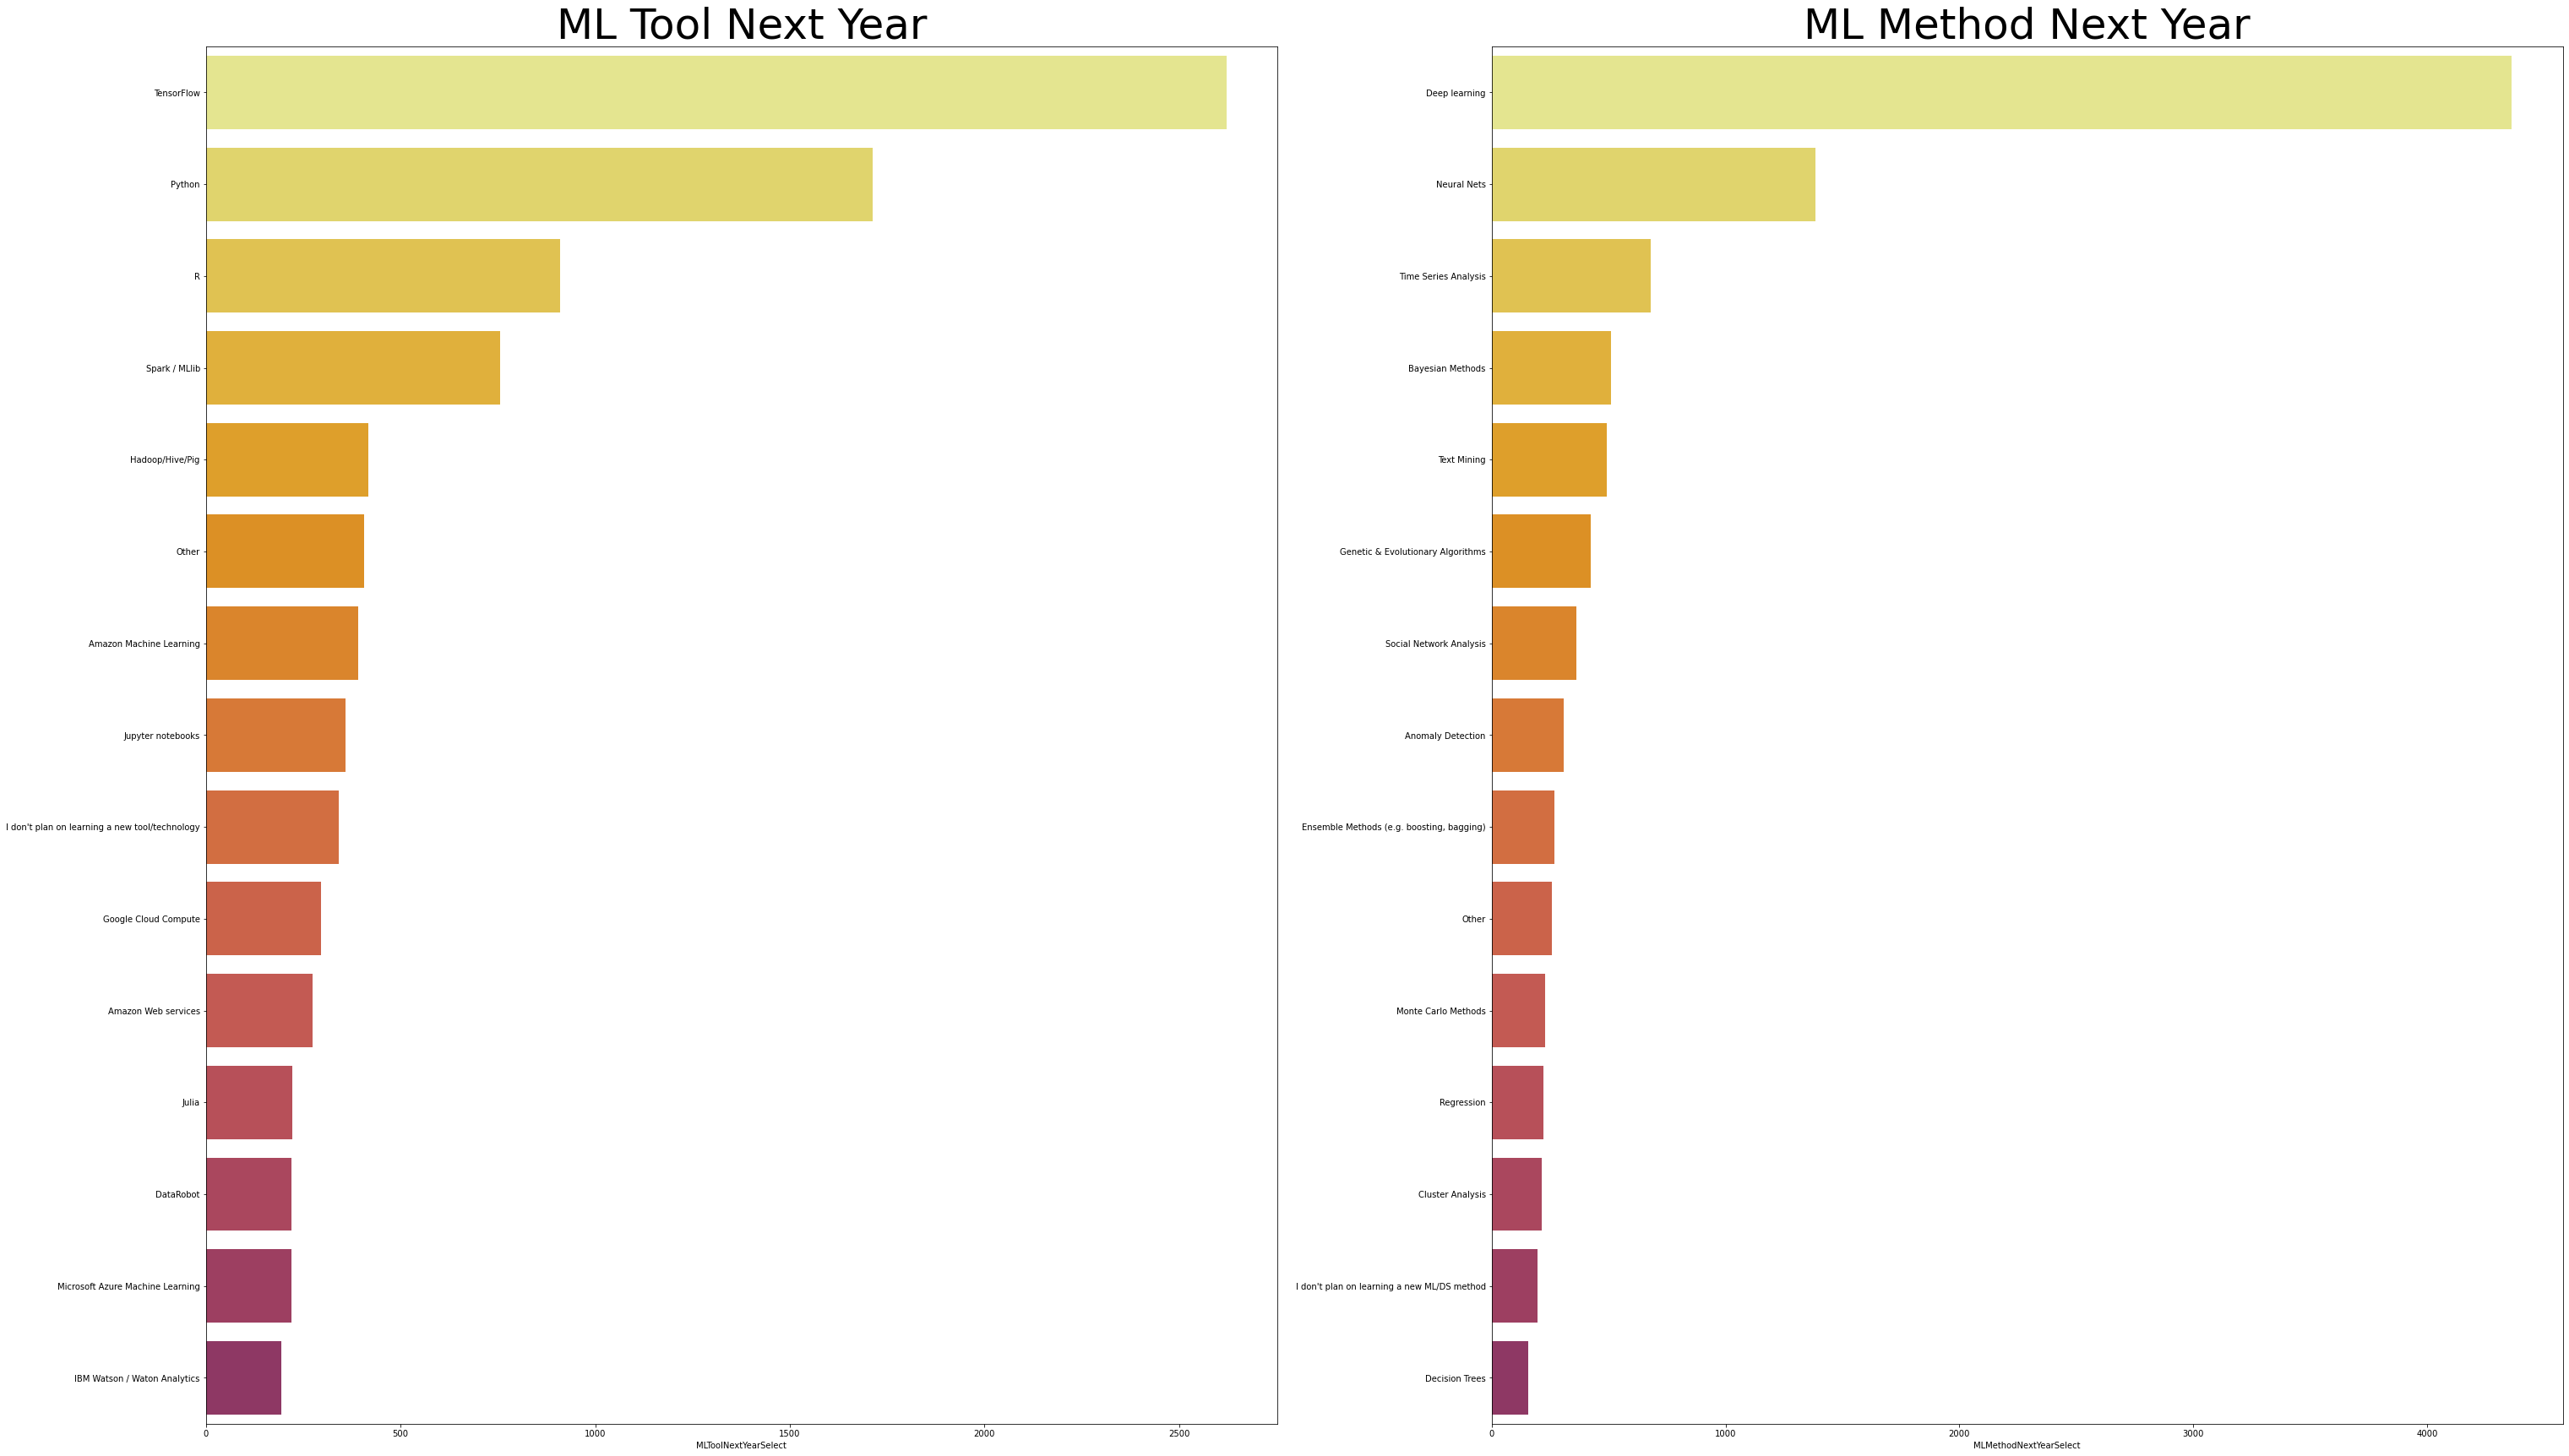

In [20]:
plt.figure(figsize = (50, 30))
ax=plt.subplot(121)
temp = data['MLToolNextYearSelect'].value_counts().head(15)
sns.barplot(y=temp.index, x=temp,palette=sns.color_palette('inferno_r',25))
plt.title("ML Tool Next Year",fontsize=50)
ax=plt.subplot(122)
temp1 = data['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=temp1.index, x=temp1,palette=sns.color_palette('inferno_r',25))
plt.title("ML Method Next Year",fontsize=50)


TensorFlow is the clear winner here. The Deep Learning framework from Google has gained a huge amount of popularity in the recent past due to its power and ease of use.

As far as DS Methods are concerned, the answers closely mirror what we obtained from DS Tools. Deep Learning and Neural Nets are the two most popular choices for Method of the Year 2018.

## Q7. Do I need an extremely powerful computer to do Data Science?

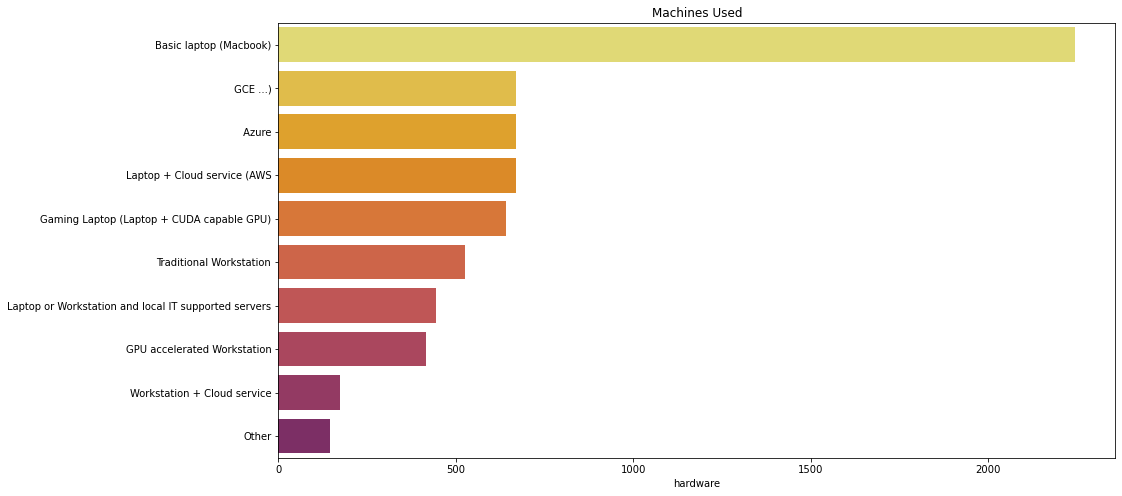

In [21]:
data['HardwarePersonalProjectsSelect'] = data['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = data.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'
s=s[s != 'nan'].value_counts()
plt.figure(figsize=(15,8))
plt.title('Machines Used')
sns.barplot(y=s.index, x=s,palette=sns.color_palette('inferno_r',15))

Most of our respondents who answered this question have stated that they use a Basic Laptop for their personal projects.

## Q8. Where Do I get Datasets From??

In [22]:
data['PublicDatasetsSelect'] = data['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))
q = data.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'
q = q[q != 'nan'].value_counts()


In [23]:
import plotly.express as px
#plt.title("Most Popular Dataset Platforms")
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(q, y=q.index, x=q.values)
fig.show()

Dataset Aggregators such as Kaggle and Socrata are the most popular platforms for people to find datasets for personal projects. Generic Google Searches and University/Non Profit Research Group Websites figure in at second and third respectively.

## Q9. What does a Data Science Job usually involve?

In [24]:
time_features = [x for x in data.columns if x.find('Time') != -1][4:10]
s = {}
for feature in time_features:
    s[feature[len('Time'):]] =data[feature].mean()

s = pd.Series(s)

In [28]:
from highcharts import Highchart
source=pd.DataFrame({'Source':s.index,'Count':s.values})
H = Highchart(width=650, height=500)

options = {
    'chart': {
        'type': 'pie',
        'options3d': {
            'enabled': True,
            'alpha': 45
        }
    },
    'title': {
        'text': "Finding Public DataSets From?"
    },
    'plotOptions': {
        'pie': {
            'innerSize': 100,
            'depth': 45
        }
    },
}

temp= source.values.tolist()

H.set_dict_options(options)
H.add_data_set(temp, 'pie', 'Count')

H

More than one-third of the time is spent on Gathering Data (Data Wrangling and Cleaning). Model Building, arguably the most glamorous part of a Data Scientist's job takes up just one fifth of his/her time.

## Q10.How much time should I spend studying Data Science?

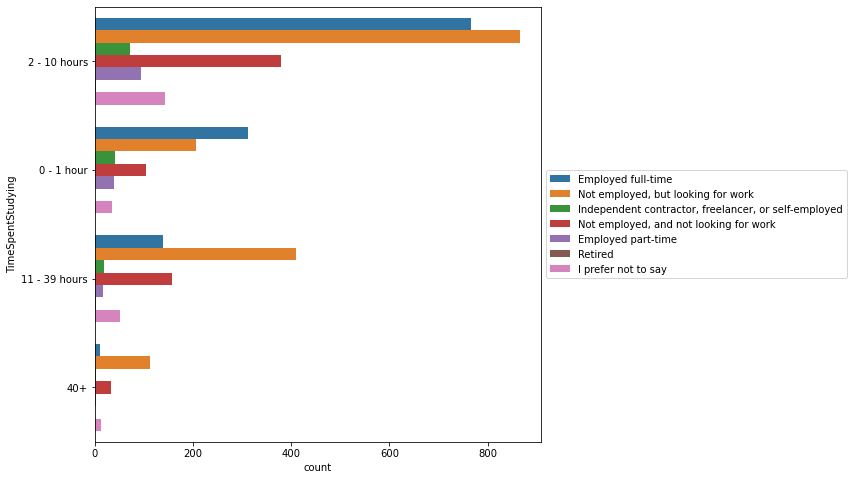

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(y='TimeSpentStudying', data=data, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

An interesting observation is that Unemployed people form the majority of the group answering this question despite being the minority in the overall population. This group typically should contain students still in college or graduate school.

Most of them tend to study more than 2 hours every week. A considerable fraction of the unemployed put in more than 10 hours of work into learning Data Science.